# Exercise 1.3

1. Load the Yale B image database and compute the economy SVD using a standard `svd` command. ✔️
2. Compute the SVD with the method of snapshots. ✔️
3. Compare the singular value spectra on a log plot. ✔️
4. Compare the first 10 left singular vectors using each method (remember to reshape them into the shape of a face). 
5. Compare a few singular vectors farther down the spectrum. Explain your findings. 

## Task 1
- Load the Yale B image database
- Compute the economy SVD.

Data matrix shape: (1152, 1008)
Data matrix rank: 1008


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

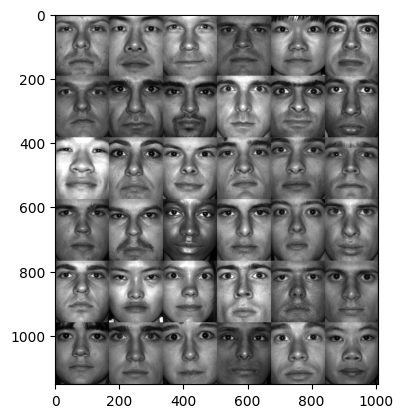

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex, Math

faces = '/workspaces/steve-brunton-book/data/allFaces.mat'
mat_contents = loadmat(faces)
faces = mat_contents['faces']
m = int(mat_contents['m'].item())
n = int(mat_contents['n'].item())
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6, m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])], (m,n)).T
        count += 1

img = plt.imshow(allPersons, cmap='gray')

# Standard SVD method
U_1, S_1, VT_1 = np.linalg.svd(allPersons, 'full_matrices=True')
Sigma_1 = np.zeros(allPersons.shape, S_1.dtype)
np.fill_diagonal(Sigma_1, S_1)
V_1 = VT_1.T     # create V matrix

# Display data structures
print(f"Data matrix shape: {np.shape(allPersons)}")
print(f"Data matrix rank: {np.linalg.matrix_rank(allPersons)}")

display(Latex(r"$U$ shape: " + str(np.shape(U_1))))
display(Latex(r"$\Sigma$ shape: " + str(np.shape(Sigma_1))))
display(Latex(r"$V$ shape: " + str(np.shape(V_1))))
                                                 

## Task 2 - Compute the SVD using the Method of Snapshots

In [3]:
corr_matrix_col = allPersons.T @ allPersons;
display(Latex(rf"$X^TX$ shape: {np.shape(corr_matrix_col)}"));

Sigmahat, V = np.linalg.eig(corr_matrix_col);
singular_values = np.sqrt(Sigmahat); # Singular values are the square roots of eigenvalues
display(Latex(r"$V$ shape: " + str(np.shape(V))));

# Display singular values
np.set_printoptions(formatter={'float': lambda x: '{:.2g}'.format(x)});
display(Latex(f"Singular values, $\\Sigma = $ {singular_values}" ));

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(-singular_values)   # Sort in descending order
singular_values = singular_values[sorted_indices]
V = V[:, sorted_indices]

# Compute left singular vectors (U)
U = allPersons @ V      # Compute U = X V
U = U / singular_values     # Normalize U by dividing by singular values

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
# Display shapes of U, Sigma, and V
display(Latex(r"$U$ shape: " + str(np.shape(U))))
display(Latex(r"$\Sigma$ shape: " + str(np.shape(singular_values))))
display(Latex(r"$V$ shape: " + str(np.shape(V))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Task 3: Compare singular value spectra on a log plot

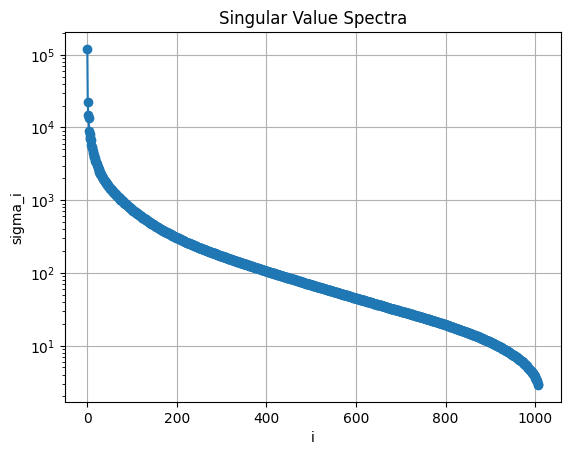

In [ ]:
# Visualize singular values
plt.figure()
plt.semilogy(singular_values, '-o')
plt.title('Singular Value Spectra (Semilogy)')
plt.xlabel('i')
plt.ylabel('sigma_i')
plt.grid()
plt.show()